In [4]:
#!/usr/bin/env python
# coding: utf-8

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,10

from scipy.ndimage.interpolation import zoom
from Classifier import VGG
from utils import gradcamutils
import innvestigate
import numpy as np
import os
from PIL import Image
import innvestigate

from Classifier.VGG import *

Using TensorFlow backend.
/home/kurowskik/wbiad3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kurowskik/wbiad3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kurowskik/wbiad3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kurowskik/wbiad3.6/lib/python3.6/site-packag

In [3]:
import os

# Get the current working directory
cwd = os.getcwd()
print(cwd)
os.chdir("/home/kurowskik/data_wb_iad/projekt/DeepCOVIDExplainer")

/home/kurowskik/data_wb_iad/projekt/DeepCOVIDExplainer


In [5]:
def createOrRestoreModel(): 
    vggModel = VGG.VGG19((224,224,3),4, False) #set up model architecture

    vggModel.summary()
    vggModel.load_weights("VGG19_COVID19.h5") #load weights

    model = vggModel

    return model 

In [11]:
model = createOrRestoreModel() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0         
__________

In [7]:
import cv2
img = np.array(cv2.imread("Example_images/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg"))[...,::-1]/255.0


In [8]:
import torch

mean = torch.Tensor([0.485, 0.456, 0.406]).reshape(1,-1,1,1)
std  = torch.Tensor([0.229, 0.224, 0.225]).reshape(1,-1,1,1)

X = (torch.FloatTensor(img[np.newaxis].transpose([0,3,1,2])*1) - mean) / std


In [9]:
import torchvision

model = torchvision.models.vgg16(pretrained=True); model.eval()
layers = list(model._modules['features']) + utils.toconv(list(model._modules['classifier']))
L = len(layers)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/kurowskik/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [12]:
import torchvision

#model = torchvision.models.vgg16(pretrained=True); model.eval()
layers = list(model._modules['features']) + utils.toconv(list(model._modules['classifier']))
L = len(layers)


AttributeError: 'Model' object has no attribute '_modules'

In [19]:
model2 = torchvision.models.vgg19(); model2.eval()
weights = torch.load("VGG19_COVID19.h5")
model2.load_state_dict()
model2.eval()


UnpicklingError: invalid load key, 'H'.

In [37]:
from torchvision import models

from saliency import SaliencyMethod, MapType, generate_saliency

ImportError: cannot import name 'SaliencyMethod'

In [36]:
pip install saliency

    100% |████████████████████████████████| 71kB 878kB/s ta 0:00:01
You are using pip version 18.1, however version 21.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [28]:
from keras_explain.grad_cam import GradCam

explainer = GradCam(model)
exp = explainer.explain( im, 0)

In [25]:
from keras.preprocessing import image
im = image.img_to_array( image.load_img(
            "Example_images/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg", target_size=(224,224, 3)))

In [29]:
type(exp[0])

numpy.ndarray

In [28]:
print( cv2.imread("Example_images/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg").shape)

(1668, 1641, 3)


In [22]:
import explainer
from explainer.explainer_base import Explainer
from explainer.deconvnet_explainer import explainer_deconvnet
from explainer.deconvnet_explainer.explainer_deconvnet import DeConvNetExplainer
from explainer.occlusion_explainer.explainer_occlusion import OcclusionExplainer
from keras.applications.imagenet_utils import decode_predictions

from DeepExplain_master.deepexplain.tensorflow.methods import DeepExplain

In [23]:
dp = OcclusionExplainer()
deconv =  DeConvNetExplainer()

In [24]:
dp.explain( model, np.expand_dims( image.img_to_array( image.load_img(
            "Example_images/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg", target_size=(224,224, 3))), axis=0), 0)

NameError: name 'DeepExplain' is not defined

In [58]:
exp

(array([[0.80910647, 0.80872333, 0.8076075 , ..., 0.05564136, 0.05568679,
         0.0557025 ],
        [0.8081509 , 0.8077691 , 0.806657  , ..., 0.05564637, 0.05569173,
         0.05570742],
        [0.8053413 , 0.80496335, 0.8038624 , ..., 0.05566097, 0.05570614,
         0.05572175],
        ...,
        [0.04839005, 0.04839096, 0.04839362, ..., 0.09914184, 0.09921863,
         0.09924456],
        [0.04837619, 0.048377  , 0.04837935, ..., 0.09936304, 0.09944142,
         0.0994679 ],
        [0.04837146, 0.04837223, 0.04837449, ..., 0.09943832, 0.09951724,
         0.09954389]], dtype=float32),
 None)

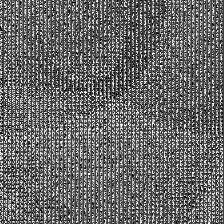

In [30]:
Image.fromarray( exp[0],"P")

In [31]:
from keras_explain.graying_out import GrayingOut

explainer = GrayingOut(model)
exp_pos, exp_neg = explainer.explain(im, 2)

/home/kurowskik/wbiad3.6/lib/python3.6/site-packages/keras_explain/graying_out.py:49: RuntimeWarning: invalid value encountered in true_divide
  results = results.sum(axis=0) / np.count_nonzero(results, axis=0)


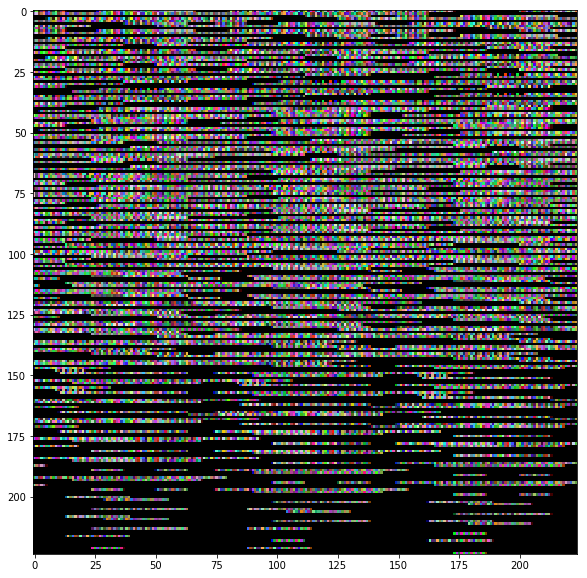

In [34]:
im2 = Image.fromarray( exp_pos,"RGB")
plt.imshow(im2)

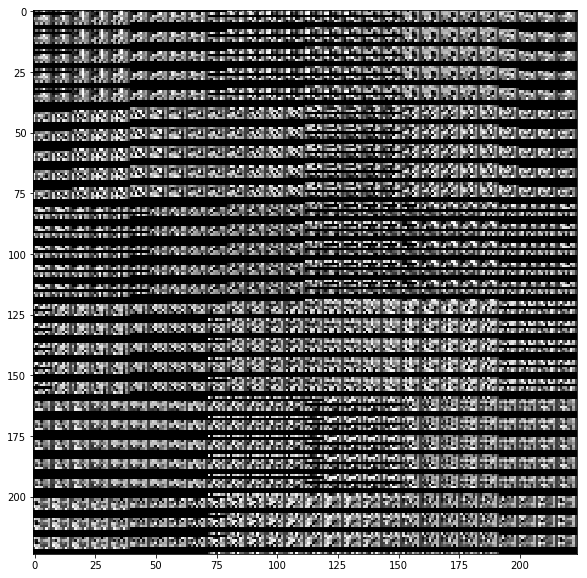

In [110]:
plt.imshow(im2)

In [95]:
from keras_explain.guided_bp import GuidedBP

explainer = GuidedBP(model)
exp = explainer.explain(im, 1)


INFO:tensorflow:Restoring parameters from /tmp/guided_backprop_ckpt


KeyError: "The name 'Z_4_1/BiasAdd:0' refers to a Tensor which does not exist. The operation, 'Z_4_1/BiasAdd', does not exist in the graph."

In [96]:
!pip install lime

import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=82403850da0229504bec01575540f0c20d9e35d9353b3f91f6cd08ee035febbb
  Stored in directory: /home/kurowskik/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [102]:
def cast_vector(row):
    return np.array(list(map(lambda x: x.astype('double'), row)))

In [105]:
im2 = cast_vector( im)
model.predict

<bound method Model.predict of <keras.engine.training.Model object at 0x7faf150538d0>>

In [104]:
explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         im2, 
         model.predict
)

plt.imshow(im2)
image, mask = explanation.get_image_and_mask(
         model.predict(
              im2
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [106]:
pip install explainX

    100% |████████████████████████████████| 798kB 7.8MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 8.7MB/s eta 0:00:01
    100% |████████████████████████████████| 112kB 7.0MB/s ta 0:00:01
  Installing build dependencies ... done
    100% |████████████████████████████████| 71kB 12.0MB/s ta 0:00:01
    100% |████████████████████████████████| 3.4MB 6.0MB/s eta 0:00:01
    100% |████████████████████████████████| 194kB 9.1MB/s eta 0:00:01
    100% |████████████████████████████████| 7.1MB 3.4MB/s ta 0:00:011
    100% |████████████████████████████████| 1.8MB 9.1MB/s eta 0:00:01
    100% |████████████████████████████████| 10.1MB 2.5MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 11.6MB 4.1MB/s ta 0:00:011
    100% |████████████████████████████████| 7.1MB 3.6MB/s eta 0:00:01
    100% |████████████